>><h1><font color="meganta">Name :- Owais Khan</font></h1>


## <p><font color="Light blue">Tips datset</font></p>
### The Tips dataset contains some tipping information that was compiled by a waiter over a few months of employment in a single restaurant. Each tip was noted in the dataset.
### Tips dataset is a data frame with 244 rows and 7 variables 

In [1]:
# importing modules

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=sns.load_dataset("tips") # reading the dataset

In [3]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df.info() #summary 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df.describe()  #describtion of data 

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Correlation of the data

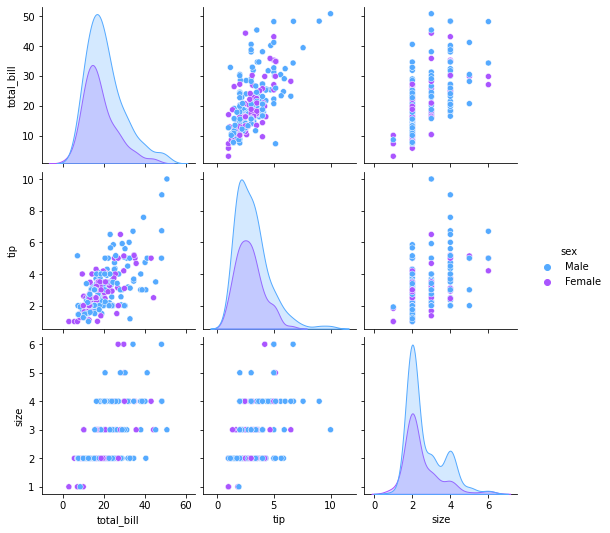

In [6]:
sns.pairplot(df, hue='sex', palette='cool') 

In [7]:
df.corr()

C:\Users\owais\AppData\Local\Temp\ipykernel_13276\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


C:\Users\owais\AppData\Local\Temp\ipykernel_13276\519422177.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="tab20")


<AxesSubplot: >

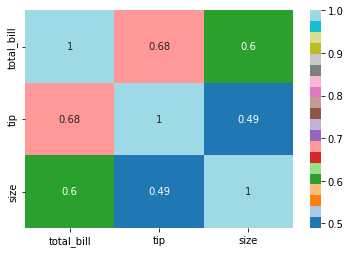

In [8]:
# heat map
sns.heatmap(df.corr(),annot=True,cmap="tab20")

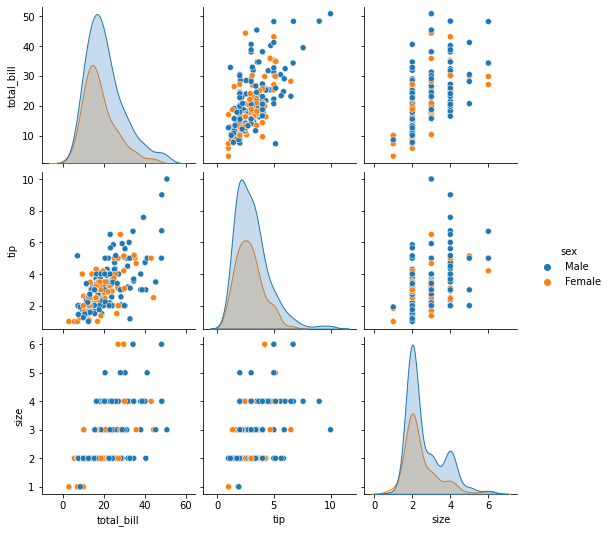

In [131]:
#pairplot based on sex variable
sns.pairplot(data=df,hue='sex')

<h1><font color="green">Answer the following questionst</font></h1>


# How many males and females are there?

In [9]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

#### There is more men than women go to restaurants in their free time. Women don't want to rest in their free time they are working again and again. you can see about half the men, women come to the restaurant

# Who has paid more bill whether it is male or female?

In [10]:

df.query("total_bill == total_bill.max()")["sex"] 

170    Male
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

<AxesSubplot: xlabel='sex', ylabel='total_bill'>

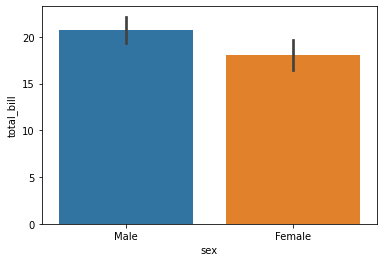

In [65]:
sns.barplot(data=df, y="total_bill",x="sex")

#### As you can see from the graph, men paid more bills than women. Because if both man and woman go together (may be date) then mostly men pay the bill if not so they both split the bill and pay. If lady comes with her friends or there is a celebration party then only lady pays

# On which day more customers are comming?


In [11]:
df["day"].value_counts() 

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [114]:
df["day"].value_counts().max

<bound method NDFrame._add_numeric_operations.<locals>.max of Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64>

<AxesSubplot: xlabel='day', ylabel='count'>

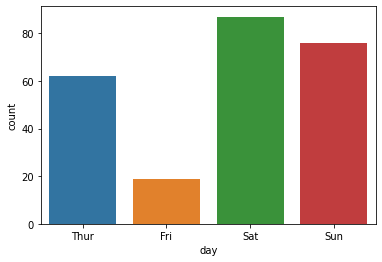

In [115]:
sns.countplot(data=df,x="day")

#### Saturday and sunday is weekend days in this people have holiday and they are free from work. Only this two days people are spending time with their family and friends because in working days people dont have time they are busy with their work. and Also in this dataset, people come saturaday as compare to sunday because after sunday their is working day start and they cant be late in morning for work.

# Find the average total bill of male and female based on smoker attribute? 

In [14]:
df.groupby(['sex','smoker'])["total_bill"].mean()

sex     smoker
Male    Yes       22.284500
        No        19.791237
Female  Yes       17.977879
        No        18.105185
Name: total_bill, dtype: float64

# What is the percentage of smokers in the given dataset

In [105]:
len(df[df["smoker"]=="Yes"])*100/len(df)  #percentage of non smoker

38.114754098360656

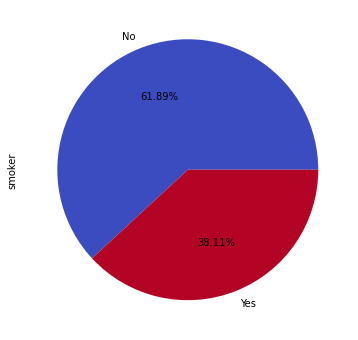

In [110]:
# There are 38.11% people are smoke 

plt.figure(figsize = (7,6))
df['smoker'].value_counts().plot(kind='pie',autopct='%.2f%%',cmap="coolwarm")
plt.show()

# Who paying the more tip on sunday?


In [12]:
df[df["day"]=="Sun"].nlargest(1,"tip")["sex"]

183    Male
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

In [13]:
df.query("day=='Sun'").query("tip==tip.max()")["sex"]

183    Male
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

# Is there any relationship between total bills and tips

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

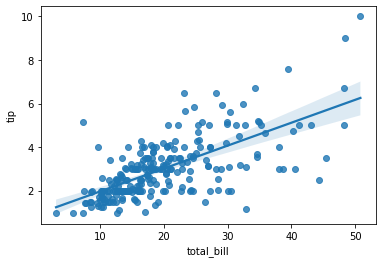

In [39]:
sns.regplot(data=df,x="total_bill",y="tip")

#### There is partially positive relationship between the tips and total bill. because mostly people give tips after they paid the bill. As you can see mostly people gives total bill between 5 dollars to 25 dollars


# Which gender has the most occupied space when the table size is 3

In [27]:
df[df["size"]==3]["sex"].value_counts()


Male      24
Female    14
Name: sex, dtype: int64

<AxesSubplot: xlabel='sex', ylabel='count'>

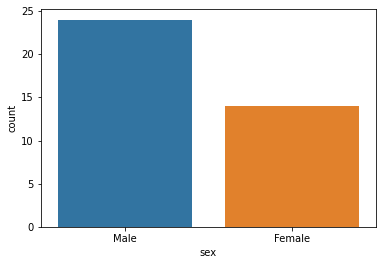

In [29]:
dff=df[df["size"]==3]
sns.countplot(data=dff,x="sex")

# What time do customers most prefer to visit the restaurant

<AxesSubplot: xlabel='time', ylabel='count'>

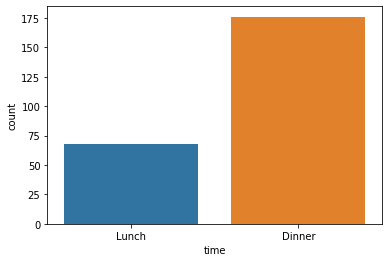

In [34]:
sns.countplot(data=df,x="time")

#### Most people go to their work during the day. Students go to school or college and adults go to office, so people do not have time to have lunch in restaurants. That's why they come to the restaurant at night.

# What is the different amout of data percentage with respect to gender ?How much higher is comparind to opposite gender

In [30]:
male=len(df[df["sex"]=="Male"])*100/len(df)
female=len(df[df["sex"]=="Female"])*100/len(df)
print(male)
print(female)

64.34426229508196
35.65573770491803


In [31]:
(len(df[df["sex"]=="Male"])-len(df[df["sex"]=="Female"]))*100/len(df)

28.688524590163933

# When it's Saturday's, which two table sizes are mostly preferred

In [118]:
df[df["day"]=="Sat"]["size"].value_counts()

2    53
3    18
4    13
1     2
5     1
Name: size, dtype: int64

<AxesSubplot: xlabel='size', ylabel='count'>

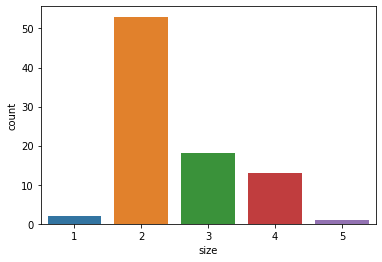

In [122]:
sns.countplot(data=df[df["day"]=="Sat"], x="size")

#### so, from the above countplot it is clear that,tables with size 2 and 3 are the top two mostly used mostly.

# Which gender has offered most valuable tips when the total bill value is between 10 to 20 dollors


In [124]:

df.query("10 > total_bill < 20").nlargest(1,"tip")["sex"]

172    Male
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

# Do you think Friday has the highest sales as compared to other days?

<AxesSubplot: xlabel='day', ylabel='count'>

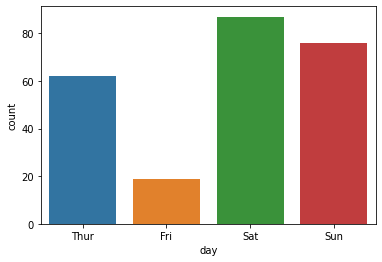

In [123]:
sns.countplot(data=df,x="day")

### NO, Friday is the last day of the working day, on this day they think that after doing all their work, they spend the weekend with their family and friends.

# Why do you feel Sunday's total bill distribution is slightly higher than other days?

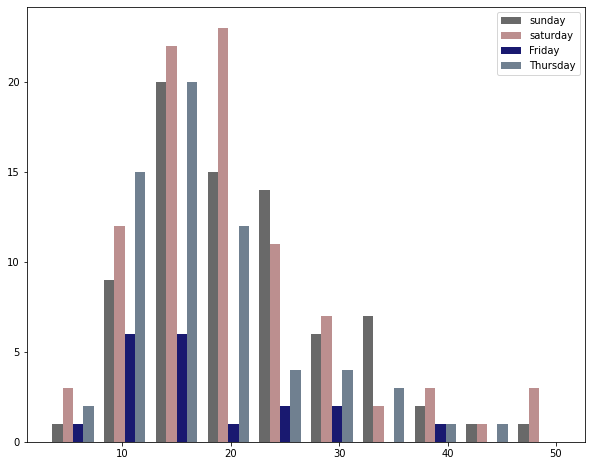

In [140]:
tips_sun=df[df["day"]=="Sun"]["total_bill"]
tips_sat=df[df["day"]=="Sat"]["total_bill"]
tips_fri=df[df["day"]=="Fri"]["total_bill"]
tips_thur=df[df["day"]=="Thur"]["total_bill"]


fig=plt.figure(figsize=(10,8))
axes1=fig.add_subplot(1,1,1)
axes1.hist([tips_sun,tips_sat,tips_fri,tips_thur],color=["dimgrey","rosybrown","midnightblue","slategrey"],label=["sunday","saturday","Friday","Thursday"])
axes1.legend()

# Group the data based on gender and find their respective averages.

In [128]:
df.groupby("sex")["total_bill","tip"].mean()

C:\Users\owais\AppData\Local\Temp\ipykernel_13276\1636465842.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("sex")["total_bill","tip"].mean()


,total_bill,tip
sex,,
Male,20.744076,3.089618
Female,18.056897,2.833448


# What are the infrequent total bill values in the dataset?

<AxesSubplot: ylabel='total_bill'>

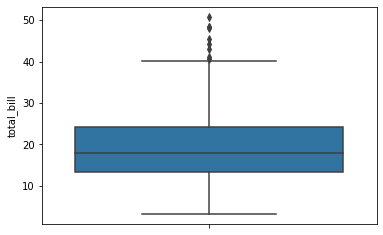

In [143]:
sns.boxplot(y=df["total_bill"])

#### the data consists of outliers An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.
#### Outliers affect the mean value of the data but have little effect on the median or mode of a given set of data.

# Which of the table sizes 2 and 4 is often preferred?

In [45]:
df1=df[((df["size"]==2)|(df["size"]==4))]
df1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
237,32.83,1.17,Male,Yes,Sat,Dinner,2
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot: xlabel='size', ylabel='count'>

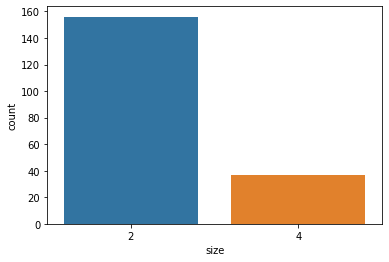

In [46]:
sns.countplot(data=df1,x="size")

In [47]:
df[((df["size"]==2)|(df["size"]==4))]["size"].value_counts()


2    156
4     37
Name: size, dtype: int64

# What is highest bill paid by the female

In [49]:
df[df["sex"]=='Female'].nlargest(1,"total_bill")

,total_bill,tip,sex,smoker,day,time,size
102,44.3,2.5,Female,Yes,Sat,Dinner,3


# What is different between the highest bill paid by the male and female

In [50]:
df.groupby('sex')['total_bill'].max()

sex
Male      50.81
Female    44.30
Name: total_bill, dtype: float64

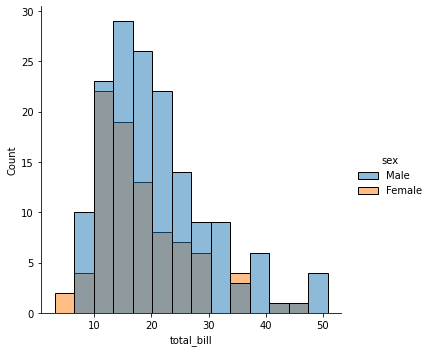

In [51]:
sns.displot(data=df,x='total_bill',hue='sex')

# Can you take random sample of 50 observations without changing its state from this data?

In [127]:
df.sample(50,random_state=20)


,total_bill,tip,sex,smoker,day,time,size
87,18.28,4.00,Male,No,Thur,Lunch,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
209,12.76,2.23,Female,Yes,Sat,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
128,11.38,2.00,Female,No,Thur,Lunch,2
172,7.25,5.15,Male,Yes,Sun,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
129,22.82,2.18,Male,No,Thur,Lunch,3
132,11.17,1.50,Female,No,Thur,Lunch,2
13,18.43,3.00,Male,No,Sun,Dinner,4


# Who loves smoking mostly and does that affect tip values when compared to non-smoking customers?

<AxesSubplot: xlabel='sex', ylabel='tip'>

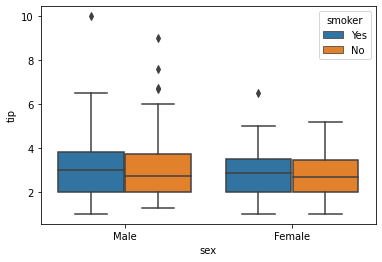

In [141]:
sns.boxplot(y=df["tip"],x=df["sex"],hue=df['smoker'])

# Some More Visualization 

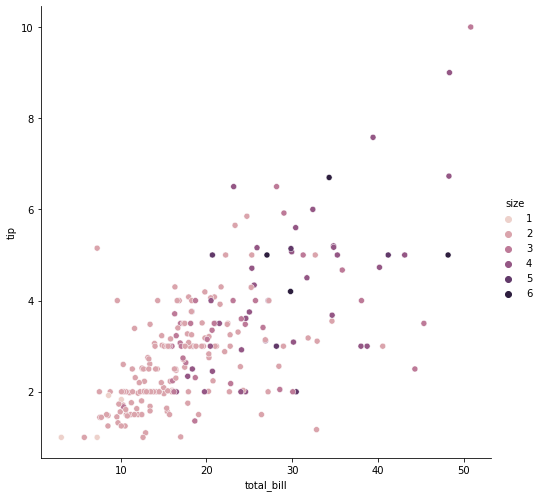

In [151]:
#regplot
sns.relplot(x = "total_bill", y = "tip", hue = "size", height = 7, data = df);

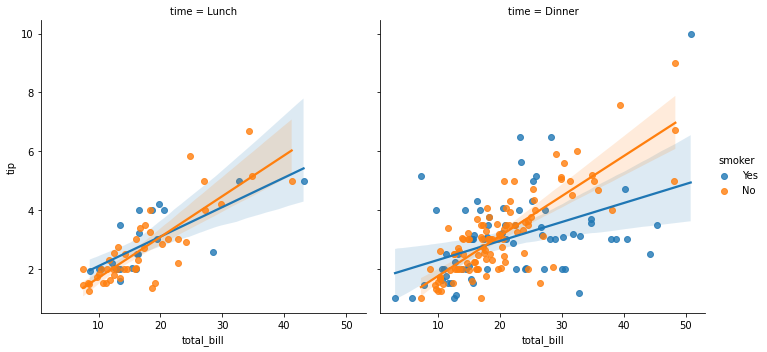

In [148]:
sns.lmplot(data = df,x = "total_bill", y = "tip", hue = "smoker", col = "time");#lmplot


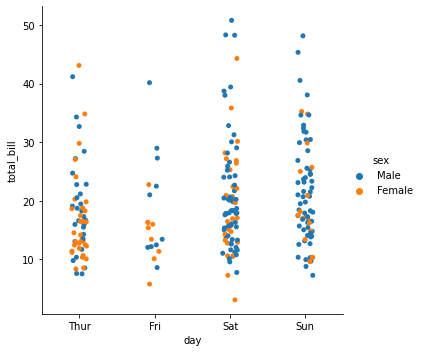

In [150]:
sns.catplot(x = "day", y = "total_bill", hue = "sex", data = df); # catplot

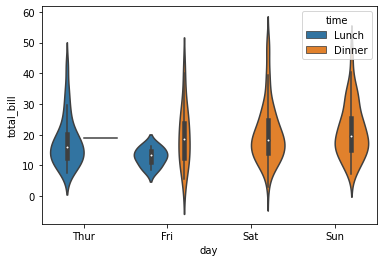

In [155]:
#violinplot
sns.violinplot(data = df,x="day",y="total_bill",hue = "time");